<div class="alert alert-info"><big><b>Комментарий ревьюера</b></big><br>Привет! 👋<br><br> Ничего не поменялось, меня всё ещё зовут Дмитрий Кирсанов. <br><br>Комментарии всё ещё обозначены пометкой <b>Комментарий ревьюера</b> и всё ещё содержат описание <br><span class="alert-success">✔️ хорошего, 👍 отличного, 📝 советов</span>,&nbsp;&nbsp;<span class="alert-warning">📌 важного, ⚠️ замечаний, 💡 рекомендаций</span>,&nbsp;&nbsp;<span class="alert-danger">🔧 доработок, 🚫 ошибок или 👀 вопросов.</span><br><br>После того, как замечание будет устранено, я сменю красный цвет на жёлтый, чтобы тебе было удобнее выделять те места, которые требуют доработки. Код, которым я предлагаю выделять твои комментарии:<br><code>&lt;div class=&quot;alert btn-primary&quot;&gt;&lt;b&gt;Комментарий студента:&lt;/b&gt;&lt;br&gt;   Ок   &lt;/div&gt;</code><br>Всё ещё просьба задавать вопросы и описывать изменения в проект.</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;👍<br>
Проект завершён, презентацию можно прислать вместе с дашбордом!
</div>

# Финальный проект  

# Банки - Анализ оттока клиентов 

## Цель задачи

Изучить данные о клиентах банка "Метанпромбанк" и отметить особенности, закономерности, которые помогут выявить причины оттока клиентов из банка. Составить отчет-презентацию с графиками, таблицами и краткими выводами, а также составить дашборд, который позволит судить об изменениях отточности в зависимости от изменений определенного параметра через некоторое время. По итогу работы неободимо сформулировать рекомендации и советы отделу маркетинга, конкретные действия, которые можно предпринять, чтобы уменьшить отток клиентов и сохранить как можно больше клиентов, которые находятся на грани ухода из банка.  

Источник данных - файл `bank_scrooge.csv`, путь к нему - [ссылка на файл](https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F).

## Описание данных

Описание содержимого файла `bank_scrooge.csv`:
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — приблизительная оценка собственности клиента,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — был ли клиент активен последнее время,
- `salary` — заработная плата клиента
- `churn` — уходит или нет.

## Работа с данными 

### Общее знакомство с данными

Прежде всего подключим все необходимые для работы библиотеки:

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import math as mth
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Хорошо, что в начале работы помещаешь описание данных и цель работы, это позволит читателям быстро понять, о чём работа.

Импорт библиотек в самом начале позволит быстро понять, какое окружение нужно для ноутбука. Такой код проще поддерживать.

Если ты не используешь потом какие-то библиотеки или методы (datetime), их импорт можно закомментировать. Если передумаешь, то сможешь убрать пометки комментирования и всё снова заработает. 

<a href='https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html'>Материал по импорту.</a> Также есть простые правила — не стоит импортировать дважды одно и то же, желательно разбивать импорт на группы (отделять друг от друга переносами строк и комментариями), при этом импорт стандартных библиотек стоит размещать в начале.
</div>

Выгрузим датасет, с которым будем работать и изучим общую информацию о нем.

In [96]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
try:
    df = pd.read_csv(path)
except:
    display('Error occured while reading data')

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
При использовании конструкции try-except важно «отлавливать» конкретный вид ошибки, возникновение которой ты ожидаешь. Название ошибки обычно написано с заглавной буквы красным цветом в конце сообщения об ошибке. Немного <a href='https://tonais.ru/file/oshibka-filenotfounderror-python'>подробнее</a> об этом.
</div>

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


В нашем датасете 10 000 записей, 11 колонок. С форматом данных столбцов исходя из их описания все хорошо. Имеем 2295 пропусков в столбце `balance`.

Посмотри на общий вид датафрейма:

In [98]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


Общий вид значений таблицы понятен, в следующем этапе работы начнем с того, что приведем названия столбцов к более удобному виду.

Посчитаем, сколько в нашей таблице дубликатов:

In [99]:
df.duplicated().sum()

1

В нашем датафрейме содержится один явный дубликат, позже избавимся от него.

Также, зная, что идентификационный номер уникален, мы впоследствии избавимся от всех строк, в которых id не уникален.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Не всегда этим проблемы с дубликатами ограничиваются.
</div>

In [100]:
### КОД РЕВЬЮЕРА
df.USERID.duplicated().sum()

136

In [101]:
ids = df[df['USERID'].duplicated()]['USERID'].unique()

In [102]:
df.query('USERID not in @ids').sort_values(by='USERID').head(30)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
7058,114087,878.0,Ярославль,М,61,5,12359917.91,2,0,1,56863.07,1
1846,114088,927.0,Ярославль,М,57,5,43277099.84,3,0,1,82619.00,0
3425,114095,845.0,Ростов,Ж,31,3,214980.98,5,0,1,62058.62,0
1059,114103,894.0,Ярославль,М,58,4,64866210.15,2,1,1,88861.60,1
3452,114170,797.0,Ярославль,Ж,50,4,545703.24,2,0,1,149247.89,0
1834,114182,890.0,Рыбинск,М,32,0,NaN,1,1,0,82847.95,0
3361,114184,856.0,Рыбинск,Ж,25,4,475727.88,4,0,1,19502.68,0
9994,114186,851.0,Ростов,М,42,3,370912.79,2,1,0,102123.93,1
20,114192,772.0,Ростов,М,43,3,1315511.65,2,0,0,143935.71,0
4025,114196,915.0,Рыбинск,М,31,0,NaN,1,1,1,133324.89,0


У записей с одним и тем же id данные очень различаются, а значит самое верное решение убрать их из рассмотрения.

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Аааа, я неправильно интерпретировал вопрос Кости, тогда да, конечно же нужно убрать все строки, в которых встречаются одни и те же идентификационные номера пользователей.  </div>

Первичное знакомство с данными закончено, качество данных имеет нормальный уровень, за исключением столбца `balance`, над заполнением пропусков которого предстоит поработать, а также столбца `USERID`, в котором мы имеем записи с одинаковыми id.

### Предобработка данных

Подготовим данные к работе с ними, а именно удалим дубликат, создадим новые столбцы, по возможности заполним как можно больше пропусков (те, которые удастся подчинить определенной логике заполнения), приведем названия столбцов к одному виду - к "змеиному" регистру, изучим распределения данных и избавимся от аномальных значений.

Начнем с названия столбцов.

In [103]:
df.columns = df.columns.str.lower()
df = df.rename(columns=({'userid':'user_id'}))

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Хорошее использование <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html'>строкового ацессора</a> pandas
</div>

Теперь удалим явный дубликат (впредь будем записывать все изменения в новую переменную `df1` для сравнения с тем, что было) и оставим именно уникальных пользователей (т.е. чтобы не было пересечений по столбцу `user_id`):

In [104]:
df1 = df.drop_duplicates().reset_index(drop=True)

In [105]:
df1 = df1.query('user_id not in @ids')

Далее попробуем найти неявные дубликаты (например, может быть в датафрейме часть женской половины имеют обозначение "Ж", а часть "ж" и тому подобное):

In [106]:
for col in ['city', 'gender']:
    display(df1[col].unique())

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

array(['Ж', 'М'], dtype=object)

В столбцах `city` и `gender` все однозначно, неявных дубликатов появиться не могло.

Перейдем к заполнению пропусков столбца `balance`.<br/>

Для этого попробуем понять, каково происхождение этих пропусков - с чем они могут быть связаны.

Посмотри на то, сколько пропусков в нашем датафрейме по различным категориям - быть может, пропуски в этом столбце только напротив клиентов с высокой зарплатой, а может связаны с чем-то другим.

Создадим вспомогательный столбец, который поможет изучить связь пропусков столбца `balance` с другими столбцами.

In [107]:
df1['balance_empty'] = df1['balance'].isna()*1

In [108]:
for col in ['city', 'gender', 'equity', 'products', 
            'credit_card', 'last_activity']:
    df_grouped_nans = df1.groupby(col).agg({'balance_empty':['sum','count']})
    df_grouped_nans.columns = ('sum', 'count')
    df_grouped_nans['ratio'] = df_grouped_nans['sum']/df_grouped_nans['count']
    print(f'Процент пропусков по категории {col} равен:')    
    df_grouped_nans = df_grouped_nans[['ratio']]
    display(df_grouped_nans)

Процент пропусков по категории city равен:


,ratio
city,
Ростов,0.167385
Рыбинск,0.217726
Ярославль,0.249739


Процент пропусков по категории gender равен:


,ratio
gender,
Ж,0.20263
М,0.25622


Процент пропусков по категории equity равен:


,ratio
equity,
0,0.841081
1,0.150000
2,0.000000
3,0.000661
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000


Процент пропусков по категории products равен:


,ratio
products,
0,1.000000
1,0.580625
2,0.061911
3,0.027641
4,0.000000
5,0.000000


Процент пропусков по категории credit_card равен:


,ratio
credit_card,
0,0.133591
1,0.274208


Процент пропусков по категории last_activity равен:


,ratio
last_activity,
0,0.215418
1,0.242340


Отсюда видим, что пропуски чаще всего у категорий клиентов с крайне низкой оценкой собственности (0) и у клиентов, не владеющих ни одним продуктом (у клиентов с одним продуктом пропусков более 50% - отдельно изучим значения баланса для них). Остальные пропуски более менее случайно распределены. Можно предположить, что у клиентов, упомянутых ранее на балансе ноль, но проверим отдельно клиентов с одним продуктом - а именно, можем ли мы считать, что у них на балансе тоже ноль.

<AxesSubplot:>

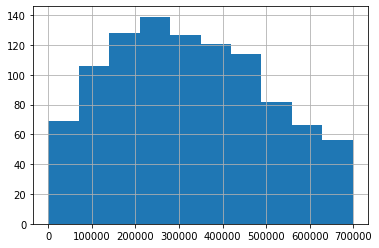

In [109]:
df1.query('products == 1 and balance < 700000')['balance'].hist()

<AxesSubplot:>

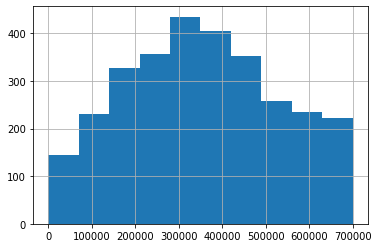

In [110]:
df1.query('products == 2 and balance < 700000')['balance'].hist()

Видим, что распределение балансов на счете у клиентов с одним или двумя продуктами схоже, а значит обработать эти пропуски (для клиентов с одним продуктом) - проблематично.

Проверим балансы клиентов с нулевой оценкой собственности.

<AxesSubplot:>

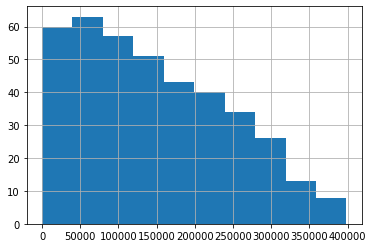

In [111]:
df1.query('equity == 0 and balance < 400000')['balance'].hist()

Но и у клиентов с нулевой оценкой собственности есть сбережения! Так что с этим тоже сложно. А пропуски клиентов без продуктов мы можем заполнить нулями.

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;⚠️<br>
Тут одна клиентка без продуктов, это аномалия. У каждого клиента банка обязательно есть какой-то продукт.
</div>

In [112]:
df1.loc[df1['products'] == 0, 'balance'] = 0

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9729 entries, 0 to 9997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9729 non-null   int64  
 1   score          9729 non-null   float64
 2   city           9729 non-null   object 
 3   gender         9729 non-null   object 
 4   age            9729 non-null   int64  
 5   equity         9729 non-null   int64  
 6   balance        7498 non-null   float64
 7   products       9729 non-null   int64  
 8   credit_card    9729 non-null   int64  
 9   last_activity  9729 non-null   int64  
 10  est_salary     9729 non-null   float64
 11  churn          9729 non-null   int64  
 12  balance_empty  9729 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.3+ MB


В таблице был лишь один клиент без продуктов. 

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Посмотрел связи пропусков с данными.  </div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Перед тем как решать что делать с пропусками необходимо сначала анализировать, нету ли какой-то зависимости между наличием пропусков и нашими данными. Необходимо построить основанную на данных гипотезу о том, с чем эти пропуски связаны. 
    
В рамках дизайн-ориентированного подхода к пропущенным данным аналитики, которые имеют доступ к информации о том, как собирались данные, оценивают пропуски на отношение к одной из трёх категорий: <ul>
<li>MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance).</li>
<li>MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать или заполнять одним значением.</li>
<li>MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.</li></ul>

В данном случае мы не не выяснили, к какому типу относятся данные пропуски до того, как что-то с ними сделали. Это неверно. Стоит изучить, как строки с пропусками зависят от имеющихся данных (в данном случае — категорий) и уже исходя из этого решать, что с ними стоит сделать.
</div><div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Ты ниже построил гипотезу: <u>баланс на счете тесно связан с зарплатой пользователя, которая варьируется в зависимости от города</u> — проверь её валидность, пожалуйста, для тех значений баланса, которые не пропущены. </div>


При заполнении воспользуемся, например, такой логикой: будем считать, что баланс на счете тесно связан с зарплатой пользователя, которая варьируется в зависимости от города. То есть найдем медианные значения каждой группы клиентов по зарплатам в разбивке по трем имеющимся в датафрейме городам. Но для того, чтобы наши средние не были сдвинуты, сначала удалим из нашего датасета аномальные значения. Для этого посмотрим гистограммы распределений и посчитаем персентили.

Перед исполнением таких действий надо проверить, действительно ли связан баланс на счете с зарплатой в зависимости от города.

In [114]:
df.query('city == "Ростов"')['est_salary'].corr(df[~(df['balance'].isna()) & (df['city'] == "Ростов")]['balance'])

0.479065285490292

In [115]:
df.query('city == "Ярославль"')['est_salary'].corr(df[~(df['balance'].isna()) & (df['city'] == "Ярославль")]['balance'])

0.32598649818332065

In [116]:
df.query('city == "Рыбинск"')['est_salary'].corr(df[~(df['balance'].isna()) & (df['city'] == "Рыбинск")]['balance'])

0.508511679651332

Для Ростова и Рыбинска величины зарплата и баланс имеют высокую связь. В Ярославле эта связь слабее в основном из-за того, что Ярославль - довольно большой город по сравнению с Ростовом и Рыбинском, и там колебания зарплат, сбережений могут быть более высокими. Но тем не менее нам удалось уловить средний положительный уровень связи в этих городах (а в двух областных городах связь и вовсе близка к высокой). Таким образом, в общих чертах мы можем рассчитывать на приемлемый уровень реалистичности при следовании этой логике.

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>✔️</big></b> пропуски исследовали, гипотезу, согласно которой зполняли пропуски</div>

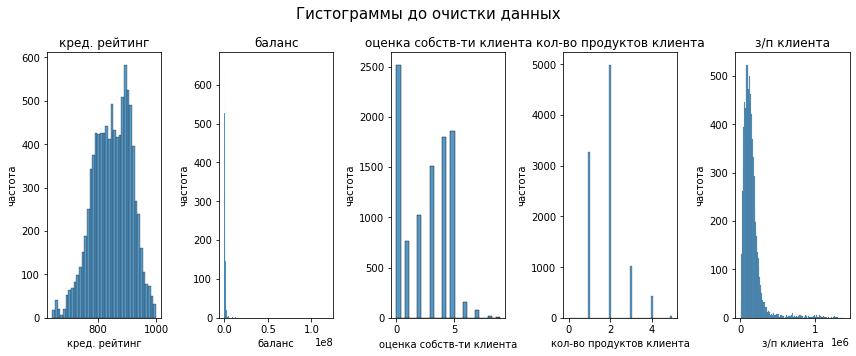

In [117]:
columns_to_drop_abnml = ['score', 'balance', 'equity', 'products', 'est_salary']
titles = ['кред. рейтинг', 
          'баланс', 
          'оценка собств-ти клиента',
          'кол-во продуктов клиента',
          'з/п клиента']
fig, axs = plt.subplots(1,len(columns_to_drop_abnml), figsize=(12,5))
for i, col in enumerate(columns_to_drop_abnml):
    sns.histplot(data=df1, x=col, ax = axs[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(titles[i])
    axs[i].set_ylabel('частота')
fig.suptitle('Гистограммы до очистки данных', fontsize=15)
plt.tight_layout()
plt.show()

На гистограммах видно, что во всех исследуемых здесь столбцах, кроме столбца с кредитным рейтингом, есть аномальные значения. На балансе буквально несколько огромных значений делают график слабо читаемым - их нужно точно убрать. С помощью перцентилей избавимся от этих значений. Так как мы имеем дело с банком, то убирать клиентов с высокими зарплатами и высокими оценками собственности не совсем корректно, иначе мы потеряем из анализируемых данных ценных клиентов. Для клиентов с высокой оценкой собственности однако поступим так - объединим в одну категорию клиентов с оценкой не меньше 6.

In [118]:
series_balance = df1[~(df1['balance']).isna()]['balance']
perc_bal = np.percentile(series_balance, [95, 99])
display('balance', perc_bal)

'balance'

array([2064436.44      , 4749603.53739999])

Таким образом, уберем из рассмотрения клиентов, у кого больше 4 продуктов, и тех, у кого на балансе более 4.8 млн. На выбросы по зарплате не будем реагировать, а то уберем из рассмотрения всех клиентов с высокими зарплатами - отдельную ценную аудиторию банков (аналогично клиенты с высокой оценкой собственности). Однако клиентов с оценкой собственности больше равно 6 объединим в отдельную категорию.

In [119]:
def equity_cat(row):
    equity = row['equity']

    if equity >= 6:
        return '6+'
    else:
        return equity


In [120]:
df1['equity_level'] = df1.apply(equity_cat, axis = 1)

Более того, совершенно незначительное число пользователей, а именно:

In [121]:
df1.query('products == 0').shape[0]

1

А именно 1 клиент с нулевым количеством продуктов попал в нашу таблицу, его тоже уберем из рассмотрения.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Аномальное значение продуктов ты решил убрать правильно. А вот убирать полностью из рассмотрения клиентов с большими значениями оценки собственности, баланса и зарплаты скорее всего не стоит — эти клиенты банку важнее прочих.
    
Не вполне понял, чего ты хочешь достичь. Но я бы советовал вообще не включать столбцы с небольшим количеством уникальных значений (скорее категориальные) в подобные методики. Всех обладателей оценок 9, 8,7 и 6 по ценности собственности ты можешь включить в одну категорию "6+".
    
Ниже пример обычного подхода к поиску выбросов.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  На самом деле думал об этом, но слишком высокие и нераспространенные значения все же смутили.  </div>

In [122]:
### КОД РЕВЬЮЕРА
num_cols = df.set_index('user_id').select_dtypes(np.number).columns.difference(df.columns[df.nunique().lt(7)])

MUL = 1.5
df_filtered = []

for col in num_cols:
    series = df[col]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    mask = (series >= (Q1 - MUL * IQR)) & (series <= (Q3 + MUL * IQR))
    df_filtered.append({
        "col":col,
        "normal_values":mask.mean(),
        "robust_mean":series.mean(),
        "robust_median":series.median(),
        "filtered_mean":series[mask].mean(),
        "filtered_median":series[mask].median(),
        "max_value":series.max(),
        "min_value":series.min(),
        "max_filtered_value":min(Q3 + MUL * IQR,series.max()),
        "min_filtered_value":max(Q1 - MUL * IQR,series.min())
    })
    
pd.DataFrame(df_filtered).sort_values("normal_values").set_index("col")\
  .style.format({
    "normal_values":"{:.2%}",
    **{c:"{:_.2f}" for c in ["max_value","min_value", "max_filtered_value", "min_filtered_value",
                             "robust_mean","robust_median","filtered_mean","filtered_median"]}})\
  .set_caption(f"Filtering with {MUL:.0%} interquartile range:")

,normal_values,robust_mean,robust_median,filtered_mean,filtered_median,max_value,min_value,max_filtered_value,min_filtered_value
col,,,,,,,,,
balance,72.77%,827_794.31,524_272.20,613_629.80,488_164.27,119_113_552.01,0.00,2_008_433.38,0.00
est_salary,95.18%,147_866.89,119_658.10,123_377.53,115_434.05,1_395_064.45,2_546.30,323_373.51,2_546.30
age,99.59%,42.84,40.00,42.68,40.00,86.00,18.00,76.50,18.00
score,99.76%,848.41,853.00,848.89,853.00,1_000.00,642.00,1_000.00,652.50
equity,100.00%,2.63,3.00,2.63,3.00,9.00,0.00,9.00,0.00


In [123]:
df1 = df1[(df1['products'] > 0) & (df1['products'] < 5) & ((df1['balance'] < perc_bal[1]) | (df1['balance'].isna()))]

Взглянем на распределение величин без выбросов:

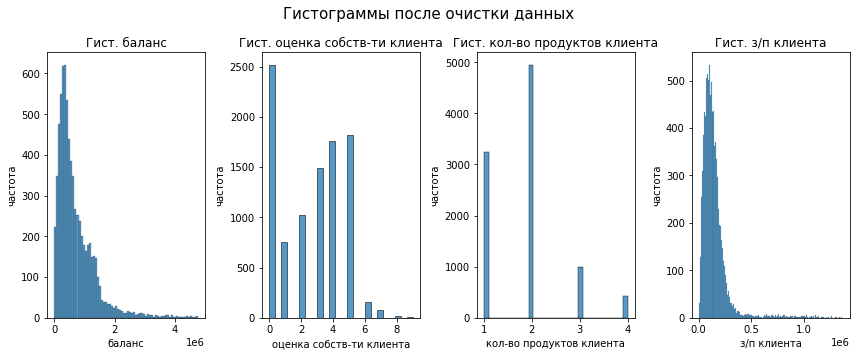

In [124]:
columns_to_drop_abnml = ['balance', 'equity', 'products', 'est_salary']
titles = ['баланс', 
          'оценка собств-ти клиента',
          'кол-во продуктов клиента',
          'з/п клиента']
fig, axs = plt.subplots(1,len(columns_to_drop_abnml), figsize=(12,5))
plt.title('Гистограммы после очистки')
for i, col in enumerate(columns_to_drop_abnml):
    if col != 'equity_level':
        sns.histplot(data=df1, x=col, ax = axs[i])
        axs[i].set_title('Гист. '+titles[i])
        axs[i].set_xlabel(titles[i])
        axs[i].set_ylabel('частота')

fig.suptitle('Гистограммы после очистки данных', fontsize=15)
plt.tight_layout()
plt.show()

Таких выбросов, как раньше не наблюдается, по зарплате и балансу имеем широкий спектр, но, как было сказано выше, всех пользователей с высокими зарплатами убирать некорректно (аналогично, с балансом). 

Узнаем, сколько клиентов мы потеряли: 

In [125]:
display('Убрали из рассмотрения {}% пользователей'.\
                                        format(round(100 - (df1['user_id'].nunique()*100/df['user_id'].nunique()), 1)))

'Убрали из рассмотрения 2.4% пользователей'

После очистки мы потеряли лишь 2.4% уникальных пользователей, информация о которых составляет:

In [126]:
round((100 - df1.shape[0]*100/df.shape[0]), 1)

3.7

Около 3.7% от всех записей датафрейма, что несущественно.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
И в то же время это 16% всех вкладов нашего банка и клиенты, зарплаты которых более чем в 3 раза выше средних зарплат клиентов в нашем банке.
</div>

In [127]:
### КОД РЕВЬЮЕРА
agg_mask = {"balance":"sum","est_salary":"mean"}
filtered_agg = df.loc[df.index.difference(df1.index)].agg(agg_mask)
raw_agg = df.agg(agg_mask)

filtered_agg / raw_agg

balance       0.169247
est_salary    1.614465
dtype: float64

После того, как мы избавились от аномальных значений, можно приступить к заполнению пропусков исходя из указанной логики. Вот она еще раз:

- Будем считать, что баланс на счете тесно связан с зарплатой пользователя, которая варьируется в зависимости от города. Для этого найдем медианные значения каждой группы клиентов по зарплатам в разбивке по трем имеющимся в датафрейме городам и заполним ими соответствующие пропуски.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Оставлю тут напоминание, что соответствие этой логике данным мы можем и должны проверить.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Выше проверил.  </div>

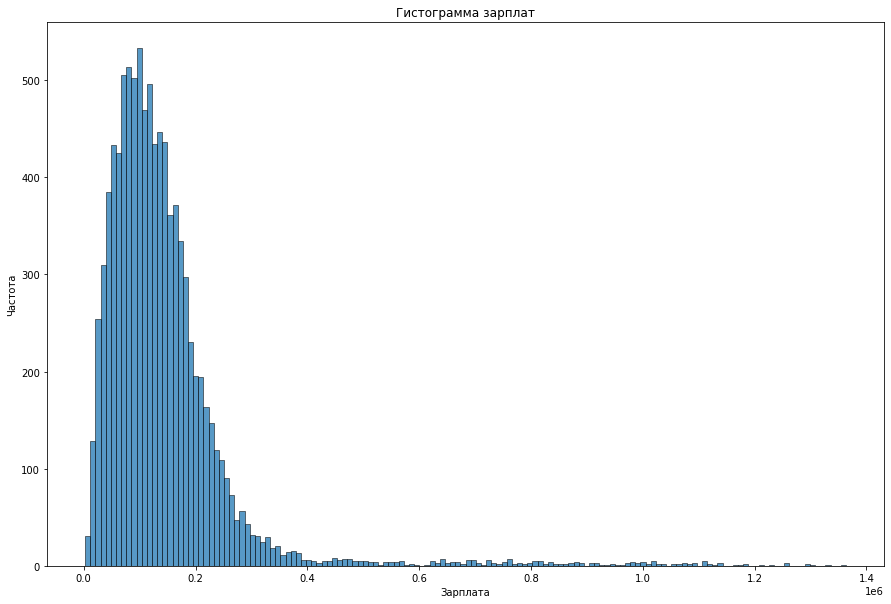

In [128]:
plt.figure(figsize=(15,10))
sns.histplot(data=df1, x='est_salary')
plt.title('Гистограмма зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Частота')

plt.show()

Для этого потребуется создать столбец, который будет отображать, к какой категории зарплат относятся клиенты, но в каждом из трех городов критерии будут разные. Найдем медианные зарплаты по городам, от которых будем отталкиваться при создании категорий:

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Не стоит делать циклами то, что можно сделать векторными функциями. В них тоже циклы, но они зачастую написаны на cython и оптимизированы.
</div>

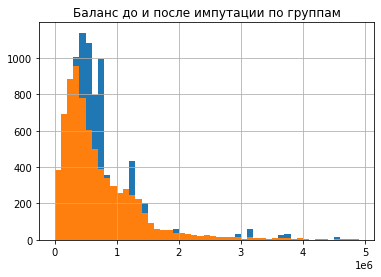

In [129]:
### КОД РЕВЬЮЕРА
df.balance.fillna(
    # округляем зп с точностью до 10 тыс.
    df.assign(salary = df.est_salary.round(-5))\
    # группируем по городам и округлённой зп
      .groupby(['city','salary'])['balance']\
    # каждое значение заменяем медианой по группе, потом заполняем этими значениями пропуски
      .transform('median')
    # выводим информативную часть гистограммы
  ).hist(bins=np.arange(0,5e6,1e5))
# выводим для сравнения оригинальное распределение
df.balance.hist(bins=np.arange(0,5e6,1e5)).set(title="Баланс до и после импутации по группам");

In [130]:
for my_city in df1['city'].unique():
    median_salary = round(df1.query('city == @my_city')['est_salary'].median(), -3)
    display(f'Самая распространенная зарплата в городе {my_city}:  {median_salary}')

'Самая распространенная зарплата в городе Рыбинск:  113000.0'

'Самая распространенная зарплата в городе Ярославль:  127000.0'

'Самая распространенная зарплата в городе Ростов:  100000.0'

Теперь построим гистограммы зарплат по городам и разобьем клиентов на категории по зарплатам:

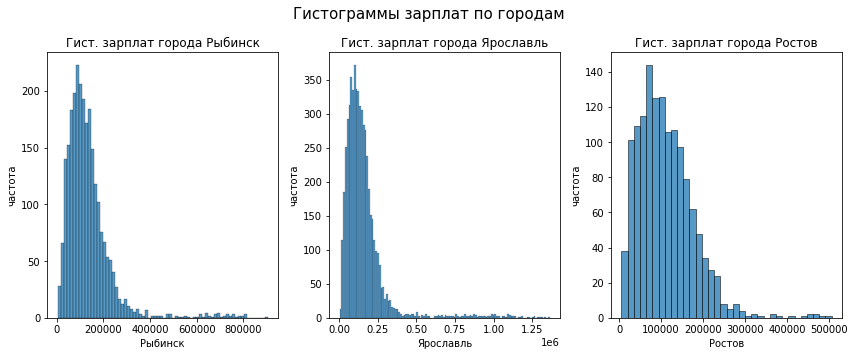

In [131]:
cities = df1['city'].unique()
titles = ['Рыбинск',
          'Ярославль',
          'Ростов']
fig, axs = plt.subplots(1,len(cities), figsize=(12,5))
for i, col in enumerate(cities):
    dfcity = df1.query('city == @col')
    sns.histplot(data=dfcity, x='est_salary', ax = axs[i])
    axs[i].set_title('Гист. зарплат города '+titles[i])
    axs[i].set_xlabel(titles[i])
    axs[i].set_ylabel('частота')
fig.suptitle('Гистограммы зарплат по городам', fontsize=15)
plt.tight_layout()
plt.show()

Гистограммы зарплат Рыбинска и Ярославля практически одинаковы - для них применим одинаковую категоризацию. Для Ростова отдельную.

Напишем функцию, которая каждой зарплате пользователя в зависимости от города будет ставить в соотвествие категорию зарплаты (низкая, средняя, высокая, очень высокая). Пусть для определенности низкая з/п - з/п, которую получают 20% клиентов с самыми низкими зарплатами, средняя - следующие 50%, высокая - следующие 20% и очень высокая - 10% клиентов с самыми высокими зарплатами. Отсюда посчитаем соответствующие перцентили и воспользуемся ими в функции.

In [132]:
def category_salary_det(row):
    city = row['city']
    salary = row['est_salary']

    if city in ['Ярославль', 'Рыбинск']:
        perc_ya_ry = np.percentile(df1.query('city != "Ростов"')['est_salary'], [20, 70, 90])
        if salary <= perc_ya_ry[0]:
            return 'низкая'
        elif salary > perc_ya_ry[0] and salary <= perc_ya_ry[1]:
            return 'средняя'
        elif salary > perc_ya_ry[1] and salary <= perc_ya_ry[2]:
            return 'высокая'
        else:
            return 'очень высокая'
    else:
        perc_ro = np.percentile(df1.query('city == "Ростов"')['est_salary'], [20, 70, 90])
        if salary <= perc_ro[0]:
            return 'низкая'
        elif salary > perc_ro[0] and salary <= perc_ro[1]:
            return 'средняя'
        elif salary > perc_ro[1] and salary <= perc_ro[2]:
            return 'высокая'
        else:
            return 'очень высокая'
        

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Обрати внимание, что такое разделение не основано на анализе разницы между отточными и неотточными (которая, правда, не особо и есть/велика именно по зарплате) и для его использования при сегментации нужно дополнительное обоснование.
    
К группе по возрасту это также относится.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Пожалуй, единственное замечание, которое не до конца понял. К чему оно относится, подскажи, пожалуйста?  </div>

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Ниже график, согласно которому надо возраст делить как до 25, 25-35, 35-50, 50-60, после 60

Сиреневой прерывистой уровень оттока, синей и оранжевой - распределения, соответственно, неотточных и отточных.
    
Могут быть дополнительные разделения, но желательно не смешивать в одном интервале скорее отточных и скорее неотточных клиентов, это помешает сегментации.
</div>

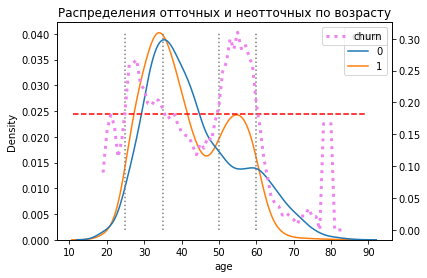

In [133]:
### КОД РЕВЬЮЕРА 2
ax = sns.kdeplot(data = df, x = 'age', hue = 'churn', common_norm=False)
ax.set(title="Распределения отточных и неотточных по возрасту")
ax2 = ax.twinx()
df.groupby('age').agg({'churn':'mean'}).rolling(3,center=True).mean().plot(ax=ax2,color="violet",ls=":",lw=3);
ax2.hlines(df.churn.mean(),11,89,ls="--",color="red")
ax2.vlines([25,35,50,60],0,.31,ls=":",color="gray")
ax.grid(False,'both','both');

In [134]:
df1['salary_group'] = df1.apply(category_salary_det, axis=1)

Сразу же создадим функцию, которая будет ставить в соответствие возрасту клиента возрастную категорию (это пригодится при дальнейших исследованиях):

In [135]:
def age_category(row):
    age = row['age']

    if 18 <= age < 35:
        return 'молодой'

    if 35 <=age < 65:
        return 'средний'

    else:
        return 'в возрасте'


In [136]:
df1['age_group'] = df1.apply(age_category, axis=1)

Перед непосредственно заполнением пропусков, посмотрим их количество по группам клиентов с разными уровнями зарплат (в процентном соотношении к размеру группы):

In [137]:
for level in ['низкая', 'средняя', 'высокая', 'очень высокая']:
    percent_nulls = round(df1.query('salary_group == @level')['balance'].\
                                        isna().sum()*100/df1.query('salary_group == @level')['balance'].shape[0])
    display(f'Количество пропусков в столбце с балансом для людей с категорией зарплаты "{level}": {percent_nulls}%.')

'Количество пропусков в столбце с балансом для людей с категорией зарплаты "низкая": 6%.'

'Количество пропусков в столбце с балансом для людей с категорией зарплаты "средняя": 18%.'

'Количество пропусков в столбце с балансом для людей с категорией зарплаты "высокая": 36%.'

'Количество пропусков в столбце с балансом для людей с категорией зарплаты "очень высокая": 58%.'

Как видим, для клиентов с очень высокими зарплатами пропусков в столбце `balance` больше, чем имеющихся непустых значений. Принимая во внимание тот факт, что колебания по зарплате у людей с очень высокой зарплатой велики, а также то, что у них предсказать баланс на счете (может пользуются другими банками, может скрывают и тд) сложнее, чем для других категорий, оставим пропуски в этом столбце у людей с такими доходами.

А для других категорий заполним в соответствие с нашей логикой, добавив еще одно маленькое рассуждение - учтем большее желание молодых людей жить эмоциями, весельями и спонтанными тратами денег, вероятно, у них на балансе меньше средств, чем у остальных двух возрастных категорий. 

Непосредственно перед заполнением зафиксируем количество пропусков в столбце `balance` до заполнения для сравнения:

In [138]:
df1['balance'].isna().sum()

2231

In [139]:
for age_cat in ['молодой', 'средний']:
    if age_cat == 'молодой':
        age_cat1 = age_cat
    else:
        age_cat1 = 'в возрасте'    
    for my_city in ['Рыбинск', 'Ярославль', 'Ростов']:
        for salary in ['низкая', 'средняя', 'высокая']:
            
            # первым циклом создаем фильтрацию по признаку молодой-немолодой,
            # вторым -  по городам, 
            # третьим - по уровню зарплат и заполняем пропуски соответствующими медианными значениями 
            df1.loc[((df1['age_group'] == age_cat1) | (df1['age_group'] == age_cat)) & 
                                         (df1['salary_group'] == salary) & 
                                                (df1['city'] == my_city) & 
                                     (df1['balance'].isna()), 'balance'] = \
                                       df1.loc[((df1['city'] == my_city) & 
                                         (df1['salary_group'] == salary) & 
                                         ((df1['age_group'] == age_cat1) | (df1['age_group'] == age_cat))), 'balance'].median()

Посмотрим, сколько пропущенных значений мы восстановили:

In [140]:
df1['balance'].isna().sum()

556

Мы восстановили около 1700 пропусков. Чтобы убедиться, что фильтрация верна, посчитаем в окончательном датафрейме количество клиентов с очень высокой зарплатой с пропусками (их должно быть 58%):


In [141]:
no_balance_well_offs = round(100 - df1.query('salary_group == "очень высокая"')['balance'].\
                                  count()*100/df1.query('salary_group == "очень высокая"').shape[0])
display(f'% клиентов с очень высокой зарплатой, для которых остались пропуски в столбце с балансом: {no_balance_well_offs}')

'% клиентов с очень высокой зарплатой, для которых остались пропуски в столбце с балансом: 58'

По крайней мере те пропуски, которые мы заполнять не собирались, остались нетронутыми.

На этом завершаем предобработку данных, впоследствии может потребоваться создание еще каких-либо столбцов, но не на данном этапе. Переходим к исследовательскому анализу данных.

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Круто, что ты очень подробно поработал с пропусками. Иногда, чтобы было удобнее анализировать значения из столбцов, в которых очень сильный разброс значений, мы можем провести логарифмирование данных, и конкретно с денежными показателями, которые могут достигать больших значений это зачастую стоит делать для установления линейных зависимостей.
</div>

### Исследовательский анализ данных

Перво-наперво посчитаем, сколько процентов клиентов уходит из банка, чтобы мы понимали, какие цифры оттока по отдельным признакам сильно выбиваются в худшую сторону:

In [142]:
df1['churn'].mean()

0.17483897776854354

Почти 18% пользователей покидают "Метанпромбанк". А как именно влияют различные показатели - узнаем дальше.

Построим графики - гистограммы с разбивкой по оттоку, чтобы увидеть общие признаки, характерные отточным клиентам.

In [143]:
def hist_churn(data, my_list=[], my_titles=[]):
    fig, axs = plt.subplots(1,len(my_list), figsize=(12,7))
    for i, col in enumerate(my_list):
        sns.histplot(
            data=data,
            hue="churn",
            x=col,
            stat="density",
            common_norm=False,
            palette="flag",
            ax = axs[i],
            kde=True
        )
        axs[i].set_title('Гист. в разрезе: '+my_titles[i])
        axs[i].set_xlabel(my_titles[i])
        axs[i].set_ylabel('Плотность')
    fig.suptitle('Гистограммы по различным признакам', fontsize=15)
    plt.tight_layout()
    plt.show()

Сначала дискретные переменные:

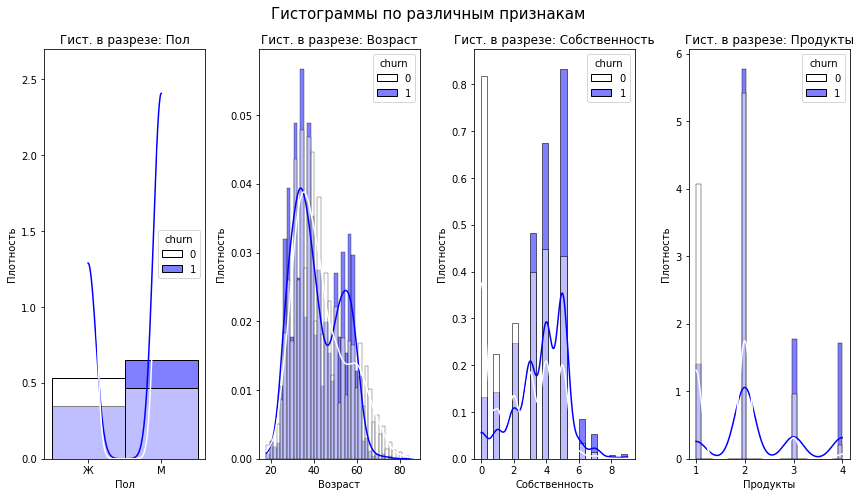

In [144]:
hist_churn(df1, ['gender', 'age', 'equity',  'products'], ['Пол', 'Возраст', 'Собственность', 'Продукты'])

А теперь для непрерывных:

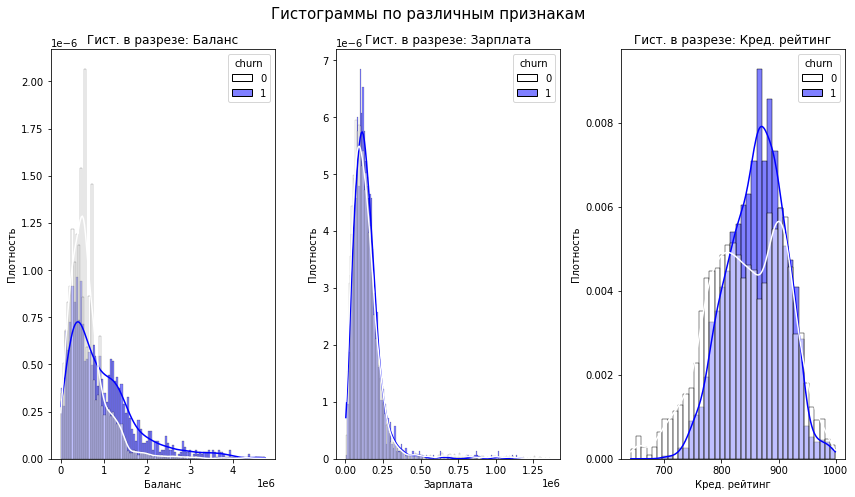

In [145]:
hist_churn(df1, ['balance', 'est_salary', 'score'], ['Баланс', 'Зарплата', 'Кред. рейтинг'])

Полученные гистограммы показывают следующее. Наиболее отточные категории - клиенты (чаще мужчины) с оценкой собственности больше 2, пользующиеся более, чем одним продуктом, имеющие на балансе более 500 тысяч. Также к оттоку более склонны пользователи с зарплатой не ниже среднего, чем клиенты с низкими зарплатами, а также аудитория с кредитным рейтингом в диапазоне от 820-830 до 920-930. Возраст тоже влияет на отток - среди клиентов, чей возраст 40-50 лет, и тех, кто старше 60 оттока значительно меньше.

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Супер! Информативно, чётко, компактно. Можно ещё добавить <tt> kde = True </tt>
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

Исходя из вида гистограммы балансы, имеет смысл создать столбец с уровнем баланса, подобно столбцу `salary_group`:

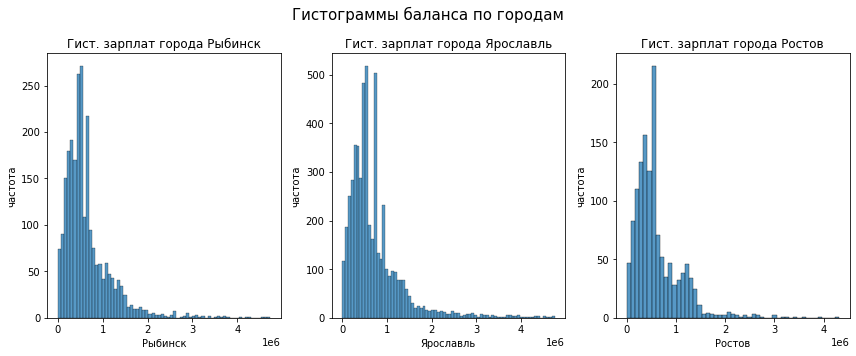

In [146]:
cities = df1['city'].unique()
titles = ['Рыбинск',
          'Ярославль',
          'Ростов']
fig, axs = plt.subplots(1,len(cities), figsize=(12,5))
for i, col in enumerate(cities):
    dfcity = df1.query('city == @col')
    sns.histplot(data=dfcity, x='balance', ax = axs[i])
    axs[i].set_title('Гист. зарплат города '+titles[i])
    axs[i].set_xlabel(titles[i])
    axs[i].set_ylabel('частота')
fig.suptitle('Гистограммы баланса по городам', fontsize=15)
plt.tight_layout()
plt.show()

Вид гистограмм баланса похож для всех трех городов, поэтому функция определения уровня баланса будет проще.

In [147]:
def category_balance_det(row):
    balance = row['balance']
    balance_series = df1[~(df1['balance'].isna())]['balance']
    perc = np.percentile(balance_series, [20, 70, 90])
    if balance == np.nan:
        return np.nan
    if balance <= perc[0]:
        return 'низкий'
    elif balance > perc[0] and balance <= perc[1]:
        return 'средний'
    elif balance > perc[1] and balance <= perc[2]:
        return 'высокий'
    else:
        return 'очень высокий'

In [148]:
df1['balance_group'] = df1.apply(category_balance_det, axis=1)

Осталось взглянуть на то, в каких городах клиенты больше склонны к оттоку, и влияет ли наличие кредитной карты или давняя последняя активность на отток.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Ячейки ниже не были выполнены перед отправкой проекта. Пожалуйста, выполняй все ячейки и отправляй проект после того, как все отработают.
</div>

In [149]:
fig = px.histogram(data_frame=df1, 
             x='city',              
             histnorm='probability',
             barmode ='overlay', 
             color='churn', 
             title='Отточность по городам')
fig.update_layout(
    xaxis_title_text='Город',
    yaxis_title_text='Вероятность')
fig.show()

Итак, выше всего отточность клиентов из Ярославля, дальше идет Ростов, а самый низкий отток клиентов в Рыбинске.

In [150]:
fig = px.histogram(data_frame=df1, 
             x='credit_card',              
             histnorm='probability',
             barmode ='overlay', 
             color='churn', 
             title='Отточность по наличию кредитной карты')
fig.update_layout(
    xaxis_title_text='Наличие карты',
    yaxis_title_text='Вероятность')
fig.show()

Весьма наглядно - клиенты банка, не имеющие кредитной карты в нашем банке, значительно чаще покидают банк, нежели те, у кого есть карта.

In [151]:
fig = px.histogram(data_frame=df1, 
             x='last_activity',              
             histnorm='probability',
             barmode ='overlay', 
             color='churn', 
             title='Отточность по последней активности')
fig.update_layout(
    xaxis_title_text='Недавняя активность',
    yaxis_title_text='Вероятность')
fig.show()

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
<s>Выше не та подпись на графике.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Подправил.  </div>

Этот график показывает, что недавно активные пользователи гораздо более склонны к уходу из банка, чем те, кто пользуется сервисом редко.

Для анализа корреляций создадим еще три новых столбца, которые будут определять является ли город записи таким-то или не является.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Не стоит применять такую технику, способ лучше:
</div>

In [152]:
df1['is_Rostov'] = (df1.city == "Ростов") * 1

In [153]:
df1['is_Yaroslavl'] = (df1.city == "Ярославль") * 1

In [154]:
df1['is_Rybinsk'] = (df1.city == "Рыбинск") * 1

И еще два столбца, которые будут кодировать пол.


In [155]:
df1['is_Man'] = (df1.gender == "М") * 1

In [156]:
df1['is_Woman'] = (df1.gender == "Ж") * 1

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Принято!  </div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>✔️</big></b>Того же можно добиться при помощи, скажем

    df1.gender.eq("М").astype(int)
</div>

Приступим к анализу корреляций. Для этого выделим отдельные сегменты клиентов, объединенные одним или несколькими признаками (в зависимости от того, как сильно влияет признак на отток) - в этом помогут расчеты процентов оттока по различным категориям.

In [157]:
for col in ['gender', 'equity_level', 'products', 
            'credit_card', 'last_activity', 'salary_group', 
            'age_group', 'city', 'balance_group']:
    if col == 'age_group':
        ages = ['молодой', 'средний']
        print('Отток по столбцу ', col)
        df_local = df1.query('age_group in @ages').groupby(col).agg({'city':'count', 'churn':'mean'}).sort_values(by='churn', ascending=False)
        df_local.columns = ('total_clients', 'churn_rate')
        display(df_local)
    if col == 'balance_group':
        balances = ['высокий', 'очень высокий']
        print('Отток по столбцу ', col)
        df_local = df1.query('balance_group in @balances').groupby(col).agg({'city':'count', 'churn':'mean'}).sort_values(by='churn', ascending=False)
        df_local.columns = ('total_clients', 'churn_rate')
        display(df_local)
    else:
        print('Отток по столбцу ', col)
        df_local = df1.groupby(col).agg({'city':'count', 'churn':'mean'}).sort_values(by='churn', ascending=False)
        df_local.columns = ('total_clients', 'churn_rate')
        display(df_local)
    print('\n')

Отток по столбцу  gender


,total_clients,churn_rate
gender,,
М,4803,0.228191
Ж,4823,0.121708




Отток по столбцу  equity_level


,total_clients,churn_rate
equity_level,,
6+,255,0.384314
5,1820,0.289011
4,1764,0.241497
3,1492,0.203753
2,1021,0.152791
1,757,0.118890
0,2517,0.032976




Отток по столбцу  products


,total_clients,churn_rate
products,,
4,427,0.632319
3,999,0.280280
2,4948,0.184115
1,3252,0.068266




Отток по столбцу  credit_card


,total_clients,churn_rate
credit_card,,
0,3049,0.246966
1,6577,0.141402




Отток по столбцу  last_activity


,total_clients,churn_rate
last_activity,,
1,4989,0.234115
0,4637,0.111063




Отток по столбцу  salary_group


,total_clients,churn_rate
salary_group,,
средняя,4812,0.184954
высокая,1924,0.181913
очень высокая,964,0.171162
низкая,1926,0.144341




Отток по столбцу  age_group


,total_clients,churn_rate
age_group,,
молодой,2757,0.206021
средний,6307,0.174568


Отток по столбцу  age_group


,total_clients,churn_rate
age_group,,
молодой,2757,0.206021
средний,6307,0.174568
в возрасте,562,0.024911




Отток по столбцу  city


,total_clients,churn_rate
city,,
Ярославль,5665,0.182348
Ростов,1382,0.180897
Рыбинск,2579,0.155099




Отток по столбцу  balance_group


,total_clients,churn_rate
balance_group,,
очень высокий,1463,0.285031
высокий,1779,0.253513


<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;✔️<br>
Посмотрели по категориям их размер и отток.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Для того, чтобы выводить текстовую информацию лучше подходит функция print

Также название столбца city может ввести в заблуждение.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Есть! И нижнее учел.  </div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
<span class="alert-danger">Возраст и баланс разбиты без учёта разницы между отточными и неотточными,</span> пожалуйста, добавь точки разбиения на категории с учётом твоего анализа гистограмм выше.
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;⚠️<br>
Второе замечание не учтено, однако возраст не использовался при сегментации и это замечание критическим не является.
</div>

Очень выделяются клиенты, у которых в распоряжении 3-4 продукта, особенно 4 (там процент оттока составляет около 63%).   
Высокий уровень оттока и у клиентов с оценкой собственности больше 3.  
Также склонны к уходу из банка клиенты очень высоким уровнем баланса - чуть меньше 30%.  
Выводы из уровня оттока клиентов в разбивке по полу сделать сложно, так как более высокий уровень оттока мужчин вряд ли связан с разными условиями обслуживания клиентов разного пола, скорее с самой природой мужского пола.  
Влияние зарплаты довольно низко, отток примерно одинаков среди всех пользователей с зарплатой больше низкой.  
Показатели оттока по наличию кредитной карты, городу, возрастной группе и активности подтверждают построенные выше гистограммы.

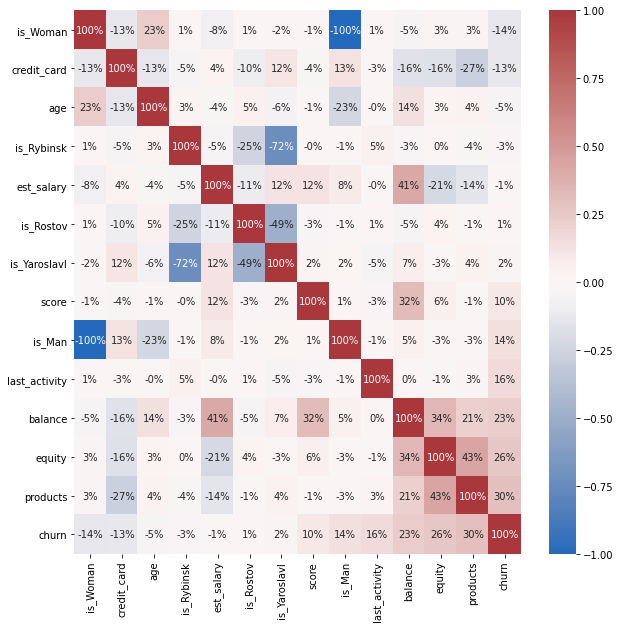

In [158]:
df_dum = pd.get_dummies(df1[['credit_card', 'age', 'is_Rybinsk', 'is_Yaroslavl', 'is_Rostov', 'score', 'balance', 'equity', 'churn', 'est_salary', 'products', 'last_activity', 'is_Man', 'is_Woman']])
df_corr = df_dum.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr.sort_values('churn').T.sort_values('churn').T, annot=True, fmt=".0%", cmap="vlag", center=0)
plt.show()

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Хорошо, что добавлены города в матрицу!
</div><div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
<s>Добавь, пожалуйста в эту таблицу также пол (необходимо закодировать столбец).
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br> Добавлено.  </div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>✔️</big></b></div>

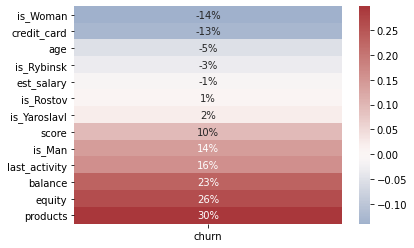

In [159]:
sns.heatmap(
    df_corr.loc[:,['churn']].drop('churn').sort_values('churn'), 
    annot=True, fmt=".0%", cmap="vlag", center=0)
plt.show()

Из данного хитмэпа можно сделать вывод - что ключевые факторы, влияющие на отток - количество продуктов пользователя, оценка собственности клиента и его баланс (чем выше показатели - тем выше отточность).

Посмотрим теперь в целом глобальные отличия между пользователями, которые уходят, и пользователями, которые остаются.

In [160]:
df1.groupby('churn').agg({'products':'mean', 'equity':'mean', 'balance':'median', 'score':'mean', 'est_salary':'median', 'credit_card':'mean', 'last_activity':'mean'})

,products,equity,balance,score,est_salary,credit_card,last_activity
churn,,,,,,,
0,1.748584,2.367116,537370.825,844.388770,117779.14,0.710940,0.481052
1,2.355318,3.741533,765810.520,861.092097,123661.21,0.552585,0.693999


<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Супер, что разные показатели смотришь по разному, однако ты очищал датасет от выбросов и можно использовать везде среднее.</div><div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
<s>Также хорошо смотреть средние по бинарным показателям, так мы увидим доли тех или иных клиентов, добавь их, пожалуйста.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Добавил.  </div>

Данная таблица подкрепляет выводы хитмэпа и показывает, что зарплата отличается минимально для пользователей, которые собираются уходить и не собираются.

Далее сконцентрируемся детальнее на клиентов банка, которые уходят.

### Детальный анализ отточных и потенциально отточных клиентов

Итак, чаще всего из банка уходят клиенты, владеющие большим количеством продуктов с более высоким уровнем баланса на счете, а также клиенты, имеющие более высокие оценки собственности и кредитного рейтинга.

Теперь разобьем пользователей на сегменты. Отдельным сегментом сразу выделим пользователей с 4 продуктами - для таких отток составляет более 60%. 

In [161]:
seg1 = df1.query('products == 4')
seg1.shape[0]

427

Следующий сегмент - пользователи с оценкой собственности более 4, для них экстремально высокие показатели оттока (как было видно выше), и пользующиеся более, чем двумя продуктами. В купе для таких клиентов показатель уровня оттока составляет:

In [162]:
round(df1.query('equity > 4 and products > 1')['churn'].mean(), 3)

0.321

близок к 50%.

In [163]:
seg2 = df1.query('equity > 4 and products > 1')
seg2.shape[0]

1755

Следующий сегмент можно получить, если взять активных клиентов, имеющих более высокий уровень баланса на счете (более 750000). Их отток:

In [164]:
round(df1.query('balance > 750000 and last_activity == 1')['churn'].mean(), 3)

0.452

более 45%.

In [165]:
seg3 = df1.query('balance > 750000 and last_activity == 1')
seg3.shape[0]

1373

В качестве следующей группы возьмем активных клиентов, у которых нет кредитной карты, но которые являются наджеными кредитозаемщиками:

In [166]:
seg4 = df1.query('credit_card == 0 and score < 930 and score > 820 and last_activity == 1')
seg4.shape[0]

1008

In [167]:
round(df1.query('credit_card == 0 and score < 930 and score > 820 and last_activity == 1')['churn'].mean(), 3)

0.467

Таких клиентов больше тысячи, а процент оттока таких клиентов составляет около 32%.

А что же по городам и возрасту? Как мы видели, больше клиентов уходит из банка, если они молодые или среднего возраста, а также отток выше из отделений банков Ростова и Ярославля.

In [168]:
seg5 = df1.query('age < 65 and city != "Рыбинск"')
seg5.shape[0]

6642

In [169]:
round(df1.query('age < 65 and city != "Рыбинск"')['churn'].mean(), 3)

0.191

Отток довольно мал. Добавим признак по зарплате - мы видели, что пользователи с низкой зарплатой (ок. 75000) не склонны к уходу.

In [170]:
seg5 = df1.query('age < 65 and city != "Рыбинск" and est_salary > 75000')
seg5.shape[0]

5153

In [171]:
round(df1.query('age < 65 and city != "Рыбинск" and est_salary > 75000')['churn'].mean(), 3)

0.198

Отток все еще не высок, это говорит о том, что спектр ключевых причин ухода из банка охватывают ранее созданные сегменты. Различие оттока пользователей по городам слабо отличается, зарплата тоже практически не влияет, как и возраст.

Итак, мы выделили следующие сегменты:  
1) Клиенты с количеством продуктов, равным четырем.   
2) Клиенты с оценкой собственности выше 4 и владеющие двумя продуктами и более.  
3) Клиенты с высоким уровнем баланса и средним кредитным рейтингом (820-930).  
4) Клиенты, не имеющие кредитных карт, но являющиеся активными.

Сводная таблица, отражающая размеры сегментов, а также их уровни оттока:

In [174]:
segments = [
    ("Клиенты с количеством продуктов, равным четырем", 'products == 4'),
    ("Клиенты с оценкой собственности выше 4 и имеющие более одного продукта", 'equity > 4 and products > 1'),
    ("Активные клиенты с высоким уровнем баланса", 'balance > 750000 and last_activity == 1'),
    ("Активные надежные* клиенты, не имеющие кредитных карт", 'credit_card == 0 and score < 930 and score > 820 and last_activity == 1')
]
df_list = []
for text, query in segments:
    this_data = df1.query(query)
    other_data_idx = df1.index.difference(this_data.index)
    result = this_data\
              .agg({"churn":["count","mean"]}).T
    result.loc['churn','Отток клиентов вне данного сегмента'] = df.loc[other_data_idx].agg({"churn":"mean"}).item()
    result.index = [text]
    result = result.rename(columns={"count":"Клиентов сегменте","mean":"Процент оттока"})
    df_list.append(result)
df_pivot = pd.concat(df_list)

In [175]:
df_pivot

,Клиентов в сегменте,Процент оттока,Отток клиентов вне данного сегмента
"Клиенты с количеством продуктов, равным четырем",427.0,0.632319,0.154473
Клиенты с оценкой собственности выше 4 и имеющие более одного продукта,1755.0,0.320798,0.144708
Активные клиенты с высоким уровнем баланса,1373.0,0.452294,0.130983
"Активные надежные* клиенты, не имеющие кредитных карт",1008.0,0.467262,0.141912


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br><s>
2 тысячи клиентов с 30% оттока это очень большой сегмент. Пожалуйста, покажи, что ты можешь применить больше одного признака отточности и объедини признак "оценка собственности выше 4" с ещё каким-то отточным признаком.
    
Ниже ты выделяешь <u>клиентов с высокой оценкой собственности или с большим количеством продуктов во владении</u>, а что если мы посмотрим объединение этих двух признаков? Ведь у нас скорее отточны и владельцы 2-4 продуктов.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Немного переделал сегменты, добавил некоторые признаки.  </div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

Эти категории клиентов наиболее часто уходят из банка. Соответственно, в противовес им, не склонны к уходу клиенты с оценкой собственнотсти ниже 4, владеющиее не более, чем двумя продуктами, имеющие на счете средний уровень баланса с кредитным рейтингом ниже или выше среднего. А что с неактивными пользователями, которые не ушли?

In [80]:
users1 = df1.query('last_activity == 0 and products == 4')['user_id'].unique()

In [81]:
users2 = df1.query('last_activity == 0 and equity > 4 and products > 1')['user_id'].unique()

In [82]:
users3 = df1.query('balance > 750000 and last_activity == 0')['user_id'].unique()

In [83]:
users4 = df1.query('last_activity == 0 and credit_card == 0 and score < 930 and score > 820')['user_id'].unique()

In [84]:
res =list(users1) + list(users2) + list(users3) + list(users4)

In [85]:
len(set(res))

2027

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Супер, что смотришь клиентов, которые находятся в зоне риска, хотя отток по этой группе невысок — уходит около 300 человек и отток в ней около 15%
    
Можно также построить портрет таких клиентов, чтобы эффективнее с ними работать и предложить им что-то конкретное.
</div>

In [86]:
### КОД РЕВЬЮЕРА
df1.set_index('user_id').loc[set(res)].agg({"churn":["sum","mean"]})

,churn
sum,307.000000
mean,0.151455


Таким образом, на грани ухода из банка находятся 2027 клиентов (вероятность их ухода весьма высока).

Сконцетрируемся следующим шагом на более неочевидных вещах. Например, зарплата.

Как мы видели выше, разница между доходами клиентов, ушедших из банка и оставшихся невелика. Проверим, является ли это отличие статистически значимым.

Мы можем воспользоваться непараметрическим тестом Уилкоксона-Манна-Уитни для проверки этого утверждения. Ввиду наличия аномальных значений в столбце зарплат пользователей лучше всего прибегнуть к этому тесту, так как он работает с рангами, не учитывая сами проранжированные значения.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;👀<br>
Есть ли какие-то более подходящие для данных с выбросами критерии?
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>  Неужели зарплата все же влияет?  </div>

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;📝<br>
Влияет, но слабо.
</div>

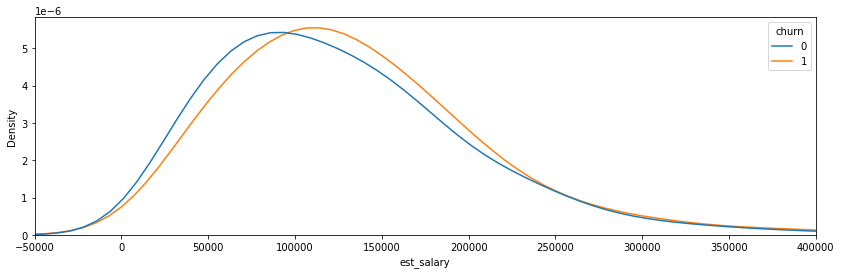

Разница медианных зарплат у уходящих и остающихся: 6.0%


In [87]:
### КОД РЕВЬЮЕРА 2
df_churn_est_salary = df.groupby('churn')['est_salary'].median()
df_churn_est_salary_diff = df_churn_est_salary[1] / df_churn_est_salary[0] - 1

fig,ax = plt.subplots(figsize=(14,4))
sns.kdeplot(ax=ax, data=df, x="est_salary", hue="churn", common_norm=False)
plt.xlim((-5e4,4e5))
plt.show()
print(f"Разница медианных зарплат у уходящих и остающихся: {df_churn_est_salary_diff:.1%}")

Итак, формулируем гипотезу H<sub>0</sub>: зарплаты ушедших и оставшихся клиентов равны.  
Альтеративная гипотеза, конкурирующая с нулевой, H<sub>1</sub>: зарплаты ушедших и оставшихся клиентов не равны.

In [88]:
alpha = .05
sample_1 = df1.query('churn == 1')['est_salary']
sample_2 = df1.query('churn == 0')['est_salary']

results = st.mannwhitneyu(sample_1, sample_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.004385090538183032
Отвергаем нулевую гипотезу: разница статистически значима


Мы получили p-value, равное 0.004, что меньше выбранного уровня доверия `alpha`. Это значит, что вероятность попасть в критическую зону, которая отвергнет нулевую гипотезу довольно высока, мы не можем считать, что разница между зарплатами не является статистически значимой. Таким образом, зарплата клиента все же незначительно (как мы видели выше), но влияет - у уходящих клиентов зарплаты повыше.

В качестве еще одной гипотезы проверим предположение о равентстве долей клиентов, покидающих банк в Ростове и Ярославле. В этом случае мы будем использовать z-статистику, что корректно, так как наши генеральные совокупности независимы и количество наблюдений велико (порядка десятка-десятков сотен). Для таких гипотез - о равенстве долей - как раз и применяется z-статистика. 
([см здесь](https://cloud.mail.ru/public/WQRM/HmjM3dQy1))  

Сформулируем нулевую гипотезу H<sub>0</sub>: доли ушедших клиентов в Ростове и Ярославле равны.  
Теперь сформулируем конкурирующую с ней альтернативу H<sub>1</sub>: доли ушедших клиентов в Ростове и Ярославле не равны.  

In [89]:
alpha = .05 

successes = np.array([df1.query('city == "Ростов"')['churn'].sum(), df1.query('city == "Ярославль"')['churn'].sum()])
trials = np.array([df1.query('city == "Ростов"').shape[0], df1.query('city == "Ярославль"').shape[0]])

stat, p_value = proportions_ztest(successes, trials)

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.9002981211339792
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Конкретно этот тест нету необходимости реализовывать самому, есть <a href='https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html'>библиотеки</a>, которые делают это за нас.
</div>

Итак, вновь получили p-значение сильно больше уровня доверия `alpha`. Это значит, что вероятность получить доли ушедших клиентов из отеделений банков этих двух городов ничтожно мала, статистически значимого отличия между долями нет, поэтому считаем оттоки в этих городах равными.

Таким образом, мы сформировали сегменты клиентов, имеющих высокие уровни оттока (все более 30%, а один и вовсе больше 60%), и проверили гипотезы, одна из которых позволила нам убедиться в том, что зарплата на отток не влияет, а другая доказала, что фактически процент уходящих клиентов в Ростове и Ярославле одинаков.

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;✔️<br>
Гипотезы сфомулированы верно, расчёты проведены и интерпретированы корректно
</div>

### Результаты анализа и ключевые выводы

По итогам исследования обнаружено следующее.  
- В целом чуть меньше 18% пользователей покидают наш банк - в среднем каждый 5-й человек уходит
- Хуже всего банку удается удерживать клиентов с высокой оценкой собственности и с большим количеством продуктов во владении (клиенты с оценкой собственности больше 4 и имеющие более 1-2 продуктов) 
- Пользователи, имеющие на своем балансе сумму более 700 000, уходят из банка значительно чаще, чем клиенты с меньшими суммами на балансе
- В зависимости от кредитного рейтинга тоже меняется отток клиентов - в большинстве случаев уходит клиент с рейтингом около 800-900
- Активные в недавнем времени пользователи уходят чаще, чем неактивные (здесь было бы неплохо посмотреть на активность именно по периоду времени, прошедшего с последней транзакции, чтобы точнее судить об активности клиентов, но такими подробностями мы не располагаем в нашем датасете)
- Владельцы кредитных карточек банка "Метанпромбанк" демонстрируют меньший уровень оттока, чем клиенты без них
- Зарплата клиента довольно слабо, но влияет на то, склонен он к уходу или нет (это показала проверенная гипотеза), чего нельзя в целом сказать о возрасте
- Отток клиентов по городам меняется слабо, но можно видеть, что в среднем банки Рыбинска удерживают клиентов лучше
- Разница оттока клиентов разного пола прослеживается, но природа этой разницы вряд ли кроется в плохом обслуживании банком именно мужчин

## Рекомендации по сегментам для снижения уровня оттока

Чтобы снизить процент уходящих из банка клиентов, можно предпринять следующие действия в зависимости от сегмента:

**Сегмент 1** -  *Клиенты с количеством продуктов, равным четырем*  

Такие клиенты наиболее ценны для банка - они активно пользуются банковскими услугами (берут кредиты, делают вклады и тд). Так как за таких клиентов стоит держаться в первую очередь, для них можно прописывать пониженные ставки по кредиту, ведь они итак приносят банку достаточно средств. Более того, таких клиентов не так много - сделав таким клиентов более выгодные условия по кредитам и вкладам, банк много не потеряет, а клиенты будут удовлетворены сильно больше.  

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Возможно клиенты с большим числом продуктов уходят из нашего банка, так и не найдя свой продукт. Также, возможно они ищут какое-то сочетание продуктов, которого у нас пока нет (либо при сочетании нескольких продуктов есть какие-то неоптимальные тарифы или плохо совмещающиеся условия), и по набору продуктов у таких клиентов мы можем понять, чего они ищут и предложить им какой-то комплексный продукт, с которым им будет проще взаимодействовать, но который будет удовлетворять их потребности.
</div>

**Сегмент 2** - *Клиенты с оценкой собственности выше 4 и владеющие двумя и более продуктами*  

Эти клиенты платежеспособны и, скорее всего, желают высокого уровня сервиса в банке. Исходя из высокого уровня оттока в разрезе многих признаков, уровень обслуживания в банке хромает, в частности, следует поднять экспертность работников банка в области недвижимости. Быть может тогда, клиенты будут более заинтересованы в пользовании услуг банка, предоставляющего более эффективные стратегии распоряжения средствами, предназначенными для деятельности с собственностью. Например, клиентам с высокой оценкой собственности можно предложить страховые услуги по более низкому коэффициенту при страховании более одного объекта собственности в нашем банке (на автомобили/жилье/при путешествиях - для людей с такими доходами, вероятно, поездка за границу не редкость).

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
<s>Приведи, пожалуйста, конкретные примеры услуг банка, которые ты предлагаешь развивать.
</div>

**Сегмент 3** - *Активные клиенты с высоким уровнем баланса*  

Клиентам данного сегмента стоит сделать специальные предложения, которые позволят увеличить кэшбек, например, чтобы простимулировать клиентов к покупкам по карте банка и, как следствие, к более частым пополнениям счета (а такая категория будет покупать и пополнять счет - мы имеем дело с активными клиентами).

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Клиенты с большим балансом, по-идее, будут заинтересованы в инвестиционных продуктах.
</div>

**Сегмент 4** - *Активные клиенты, не имеющие кредитных карт, но являющиеся надежными кредитозаемщиками*  

Для таких клиентов надо в первую очередь попробовать провести рекламные кампании, которые натолкнули бы их на приобретение кредитных карточек банка - рассказать им про все преимущества пользования кредиткой именного "Метанпромбанка". Было бы неплохо подкрепить приобретения карточки некоторыми бонусами на первое время, например, право на бесплатную консультацию или другие услуги банка, связанные с кредитными картами, чтобы лучше узнать об их преимуществах. Более того, ввиду надежности таких клиентов можно предложить им пониженный процент, под который можно брать кредиты.

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b></div>

Особый акцент следует уделить неушедим клиентам, попадающим в эти категории и которые давно не пользовались услугами нашего банка (таких пользователей 2027) - раздать акции и бонусы на бесплатные услуги - давние клиенты банка оценят внезапный бонус - а дальше применить стратегии по сегментам.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;📌<br>Чек-лист доделок:

* Закодировать пол численно
* Проверить гипотезу, что баланс на счете тесно связан с зарплатой пользователя, которая варьируется в зависимости от города (может помочь матрица корреляций, построенная по датасету без замен пропусков), поменять группировку, используемую для заполнения пропусков, если обнаружится более удачный вариант замен
* Категории по возрасту и балансу построить с учётом анализа гистограмм в разрезе оттока
* Добавить в расчёт портрета клиентов (средних по 2ум группам) также бинарные показатели.
* Построить сегмент минимум по 2ум признакам
* Сделать презентацию

Пожалуйста, обрати внимание, чтобы в твоей презентации до того, как зрителям показываются какие-то ответы (выводы или графики) должны быть заданы вопросы (раскрыты цели исследования).
    
Чтобы на презентацию можно было сослаться, у неё должен быть автор и год работы. Слайды должны быть по всем ключевым моментам работы, а к каждому графику должен быть написан тезис, который он доказывает.

В презентации должны быть портреты клиентов, гистограммы значимых признаков, столбец матрицы корреляций, описание сегментов и рекомендации для них, а также то, что ты сочтёшь нужным.
</div>

In [94]:
df1.to_csv('bank_df.csv', index=False)